In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

In [312]:
current_state = np.random.get_state()

# Extract the seed from the state
current_seed = current_state[1][0]

print("Current seed:", current_seed)

Current seed: 2132562121


In [313]:
np.random.seed(2132562121)

fixing random seed of numpy

**Load Dataset**

In [211]:
df1=pd.read_csv('/content/Churn_Modelling.csv')

In [212]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
df1.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [214]:
df1.shape

(10000, 14)

In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [216]:
df1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [217]:
df1.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [218]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

no null values

In [219]:
df1.duplicated().sum()

0

no duplicate values

In [220]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [221]:
import numpy as np
from scipy import stats

**Histogram**

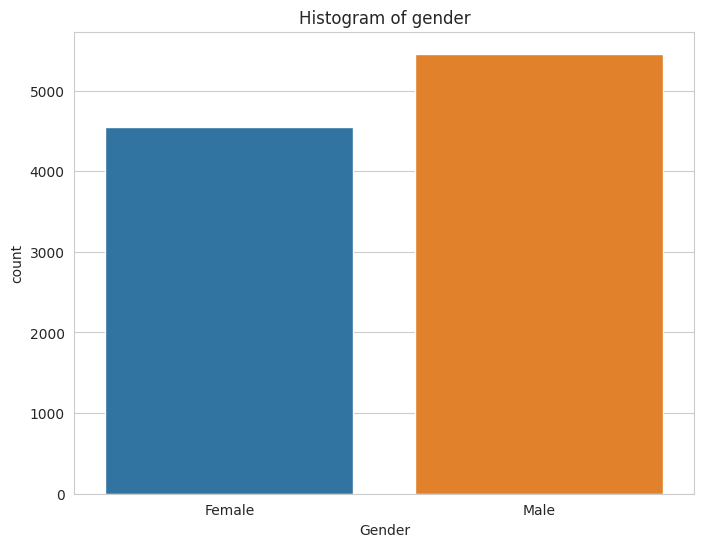

In [222]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of gender")
sns.countplot(x='Gender', data=df1)
plt.show()

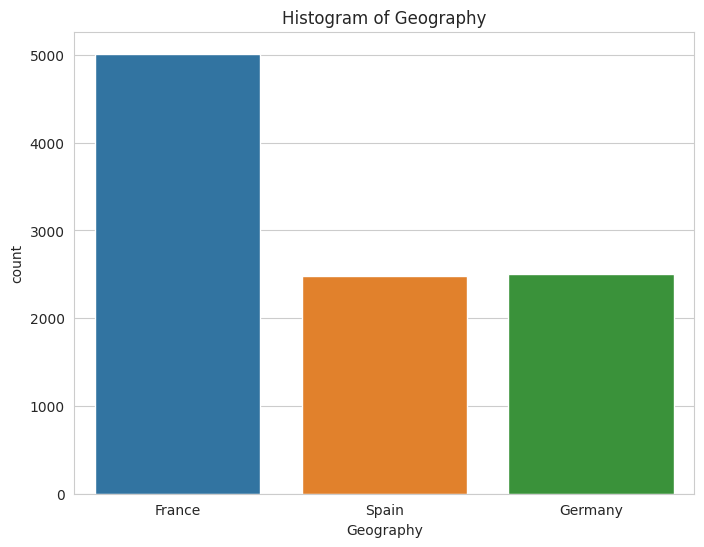

In [223]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Geography")
sns.countplot(x='Geography', data=df1)
plt.show()

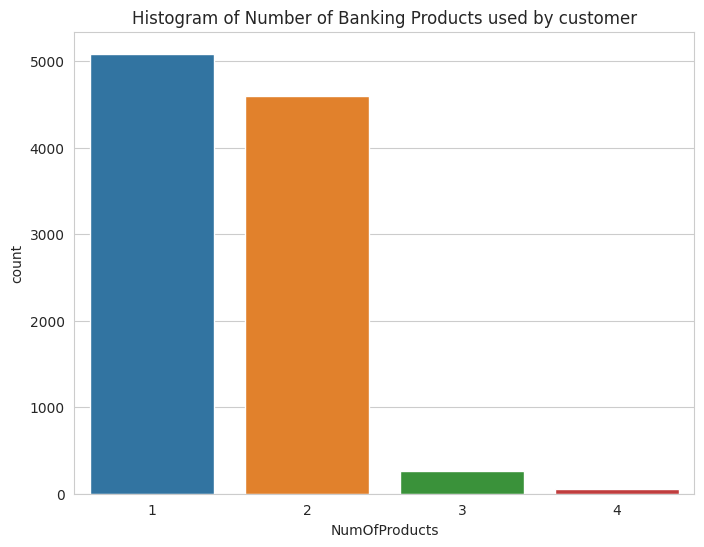

In [224]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Number of Banking Products used by customer")
sns.countplot(x='NumOfProducts', data=df1)
plt.show()

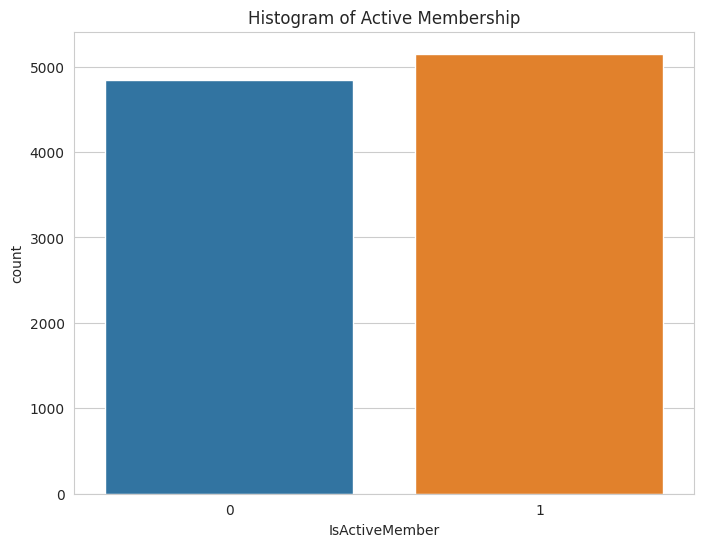

In [225]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Active Membership")
sns.countplot(x='IsActiveMember', data=df1)
plt.show()

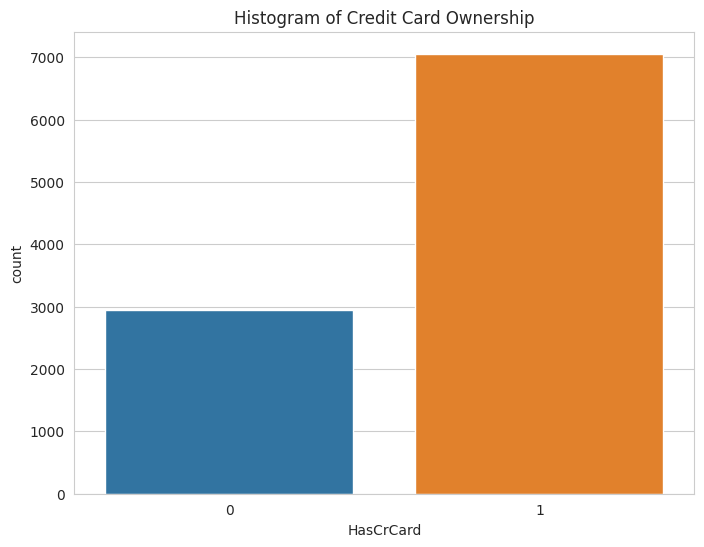

In [226]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Credit Card Ownership")
sns.countplot(x='HasCrCard', data=df1)
plt.show()

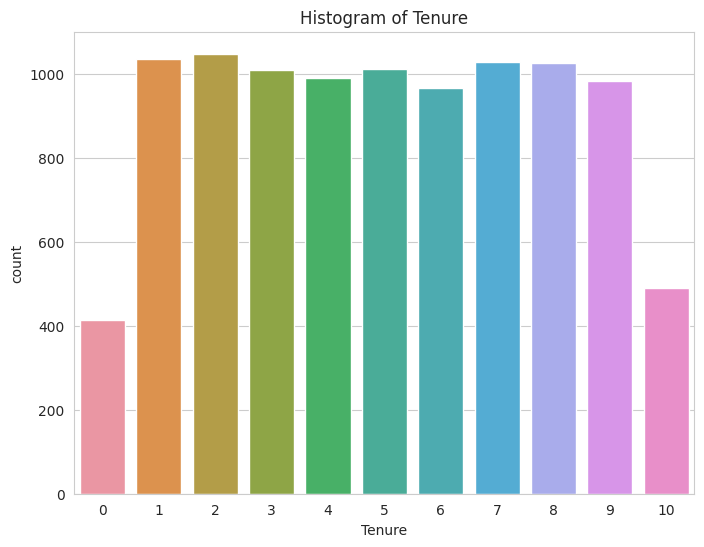

In [227]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Tenure")
sns.countplot(x='Tenure', data=df1)
plt.show()

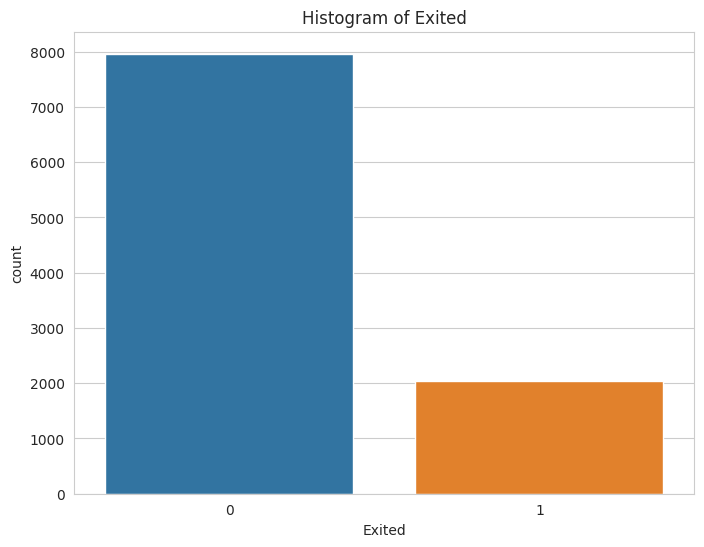

In [228]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Exited")
sns.countplot(x='Exited', data=df1)
plt.show()

**Boxplot**

<Axes: xlabel='Exited', ylabel='Tenure'>

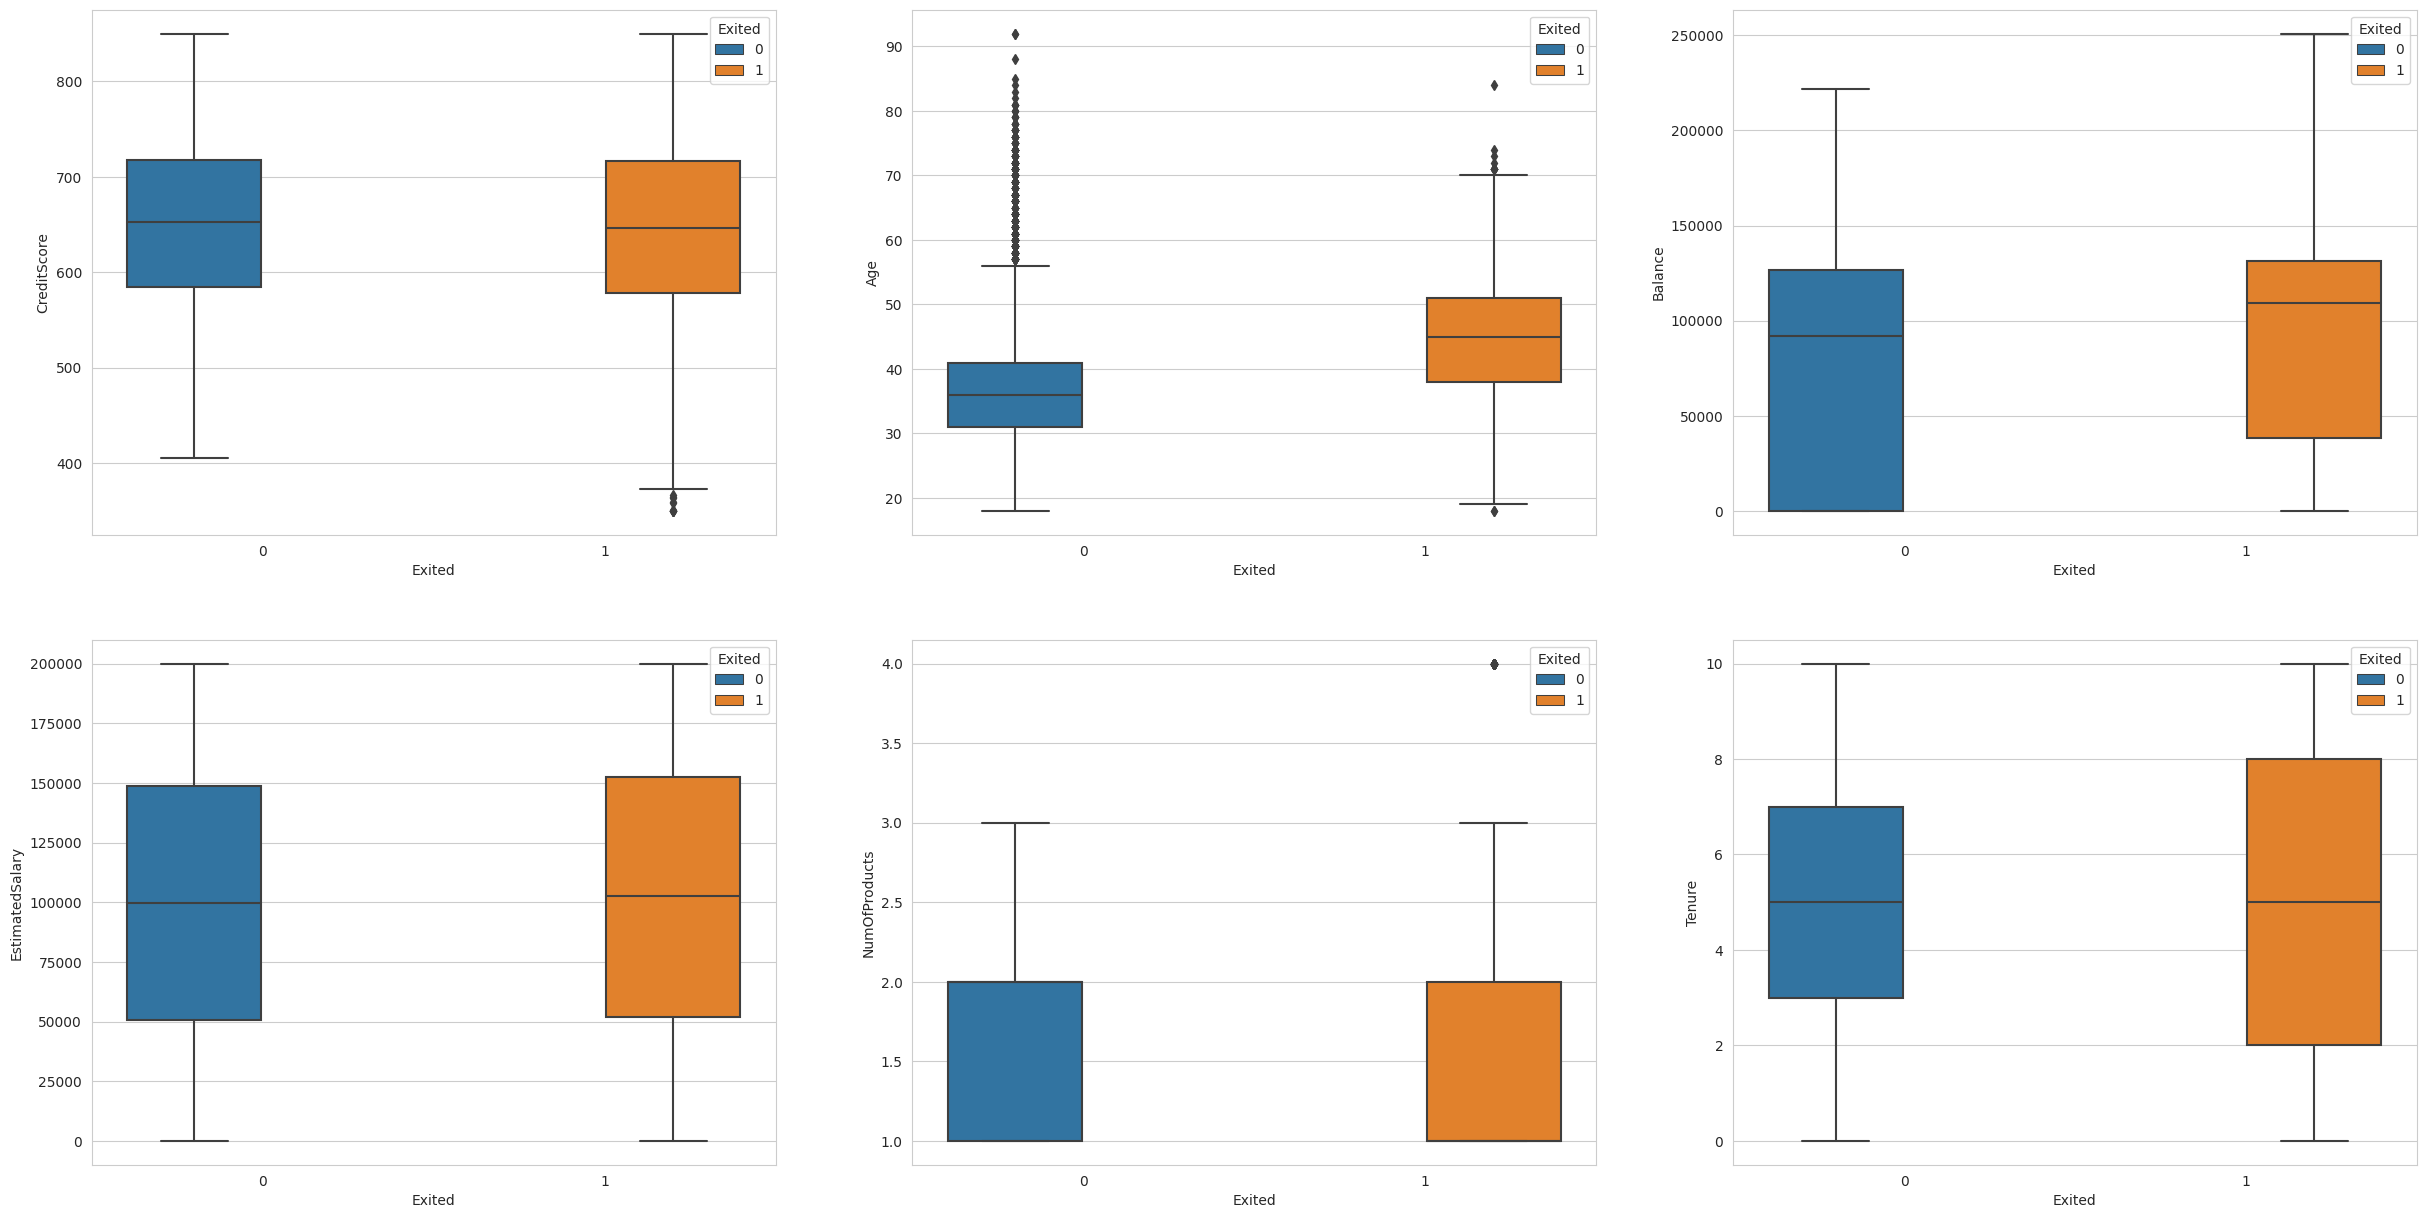

In [229]:

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df1, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df1, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df1, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df1, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df1, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df1, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

**Outliers**

In [230]:
numerical_features = ['Age', 'CreditScore','NumOfProducts', 'Tenure', 'Balance', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']

# Calculate IQR for each numerical feature
Q1 = df1[numerical_features].quantile(0.25)
Q3 = df1[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df1[numerical_features] < lower_bound) | (df1[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
Age                359
CreditScore         15
NumOfProducts       60
Tenure               0
Balance              0
EstimatedSalary      0
HasCrCard            0
IsActiveMember       0
dtype: int64


counting outliers

In [231]:
# Calculate Q1 and Q3 for each column
Q1 = df1[['Age', 'CreditScore','NumOfProducts']].quantile(0.25)

Q3 = df1[['Age', 'CreditScore','NumOfProducts']].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from specific columns
df = df1[
    (df1['Age'] >= lower_bound['Age']) & (df1['Age'] <= upper_bound['Age']) &
    (df1['CreditScore'] >= lower_bound['CreditScore']) & (df1['CreditScore'] <= upper_bound['CreditScore']) &
    (df1['NumOfProducts'] >= lower_bound['NumOfProducts']) & (df1['NumOfProducts'] <= upper_bound['NumOfProducts'])
]

# Print the shape of the new dataframe without outliers
print("Shape of DataFrame after removing outliers:", df.shape)

Shape of DataFrame after removing outliers: (9568, 14)


deleting outlier datapoints

In [232]:
numerical_features = ['Age', 'CreditScore','NumOfProducts']

# Calculate IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
Age              163
CreditScore        1
NumOfProducts      0
dtype: int64


after removing some outlire ..final outlier count

In [233]:
df.shape

(9568, 14)

**Boxplot after removing outliers**

<Axes: xlabel='Exited', ylabel='Tenure'>

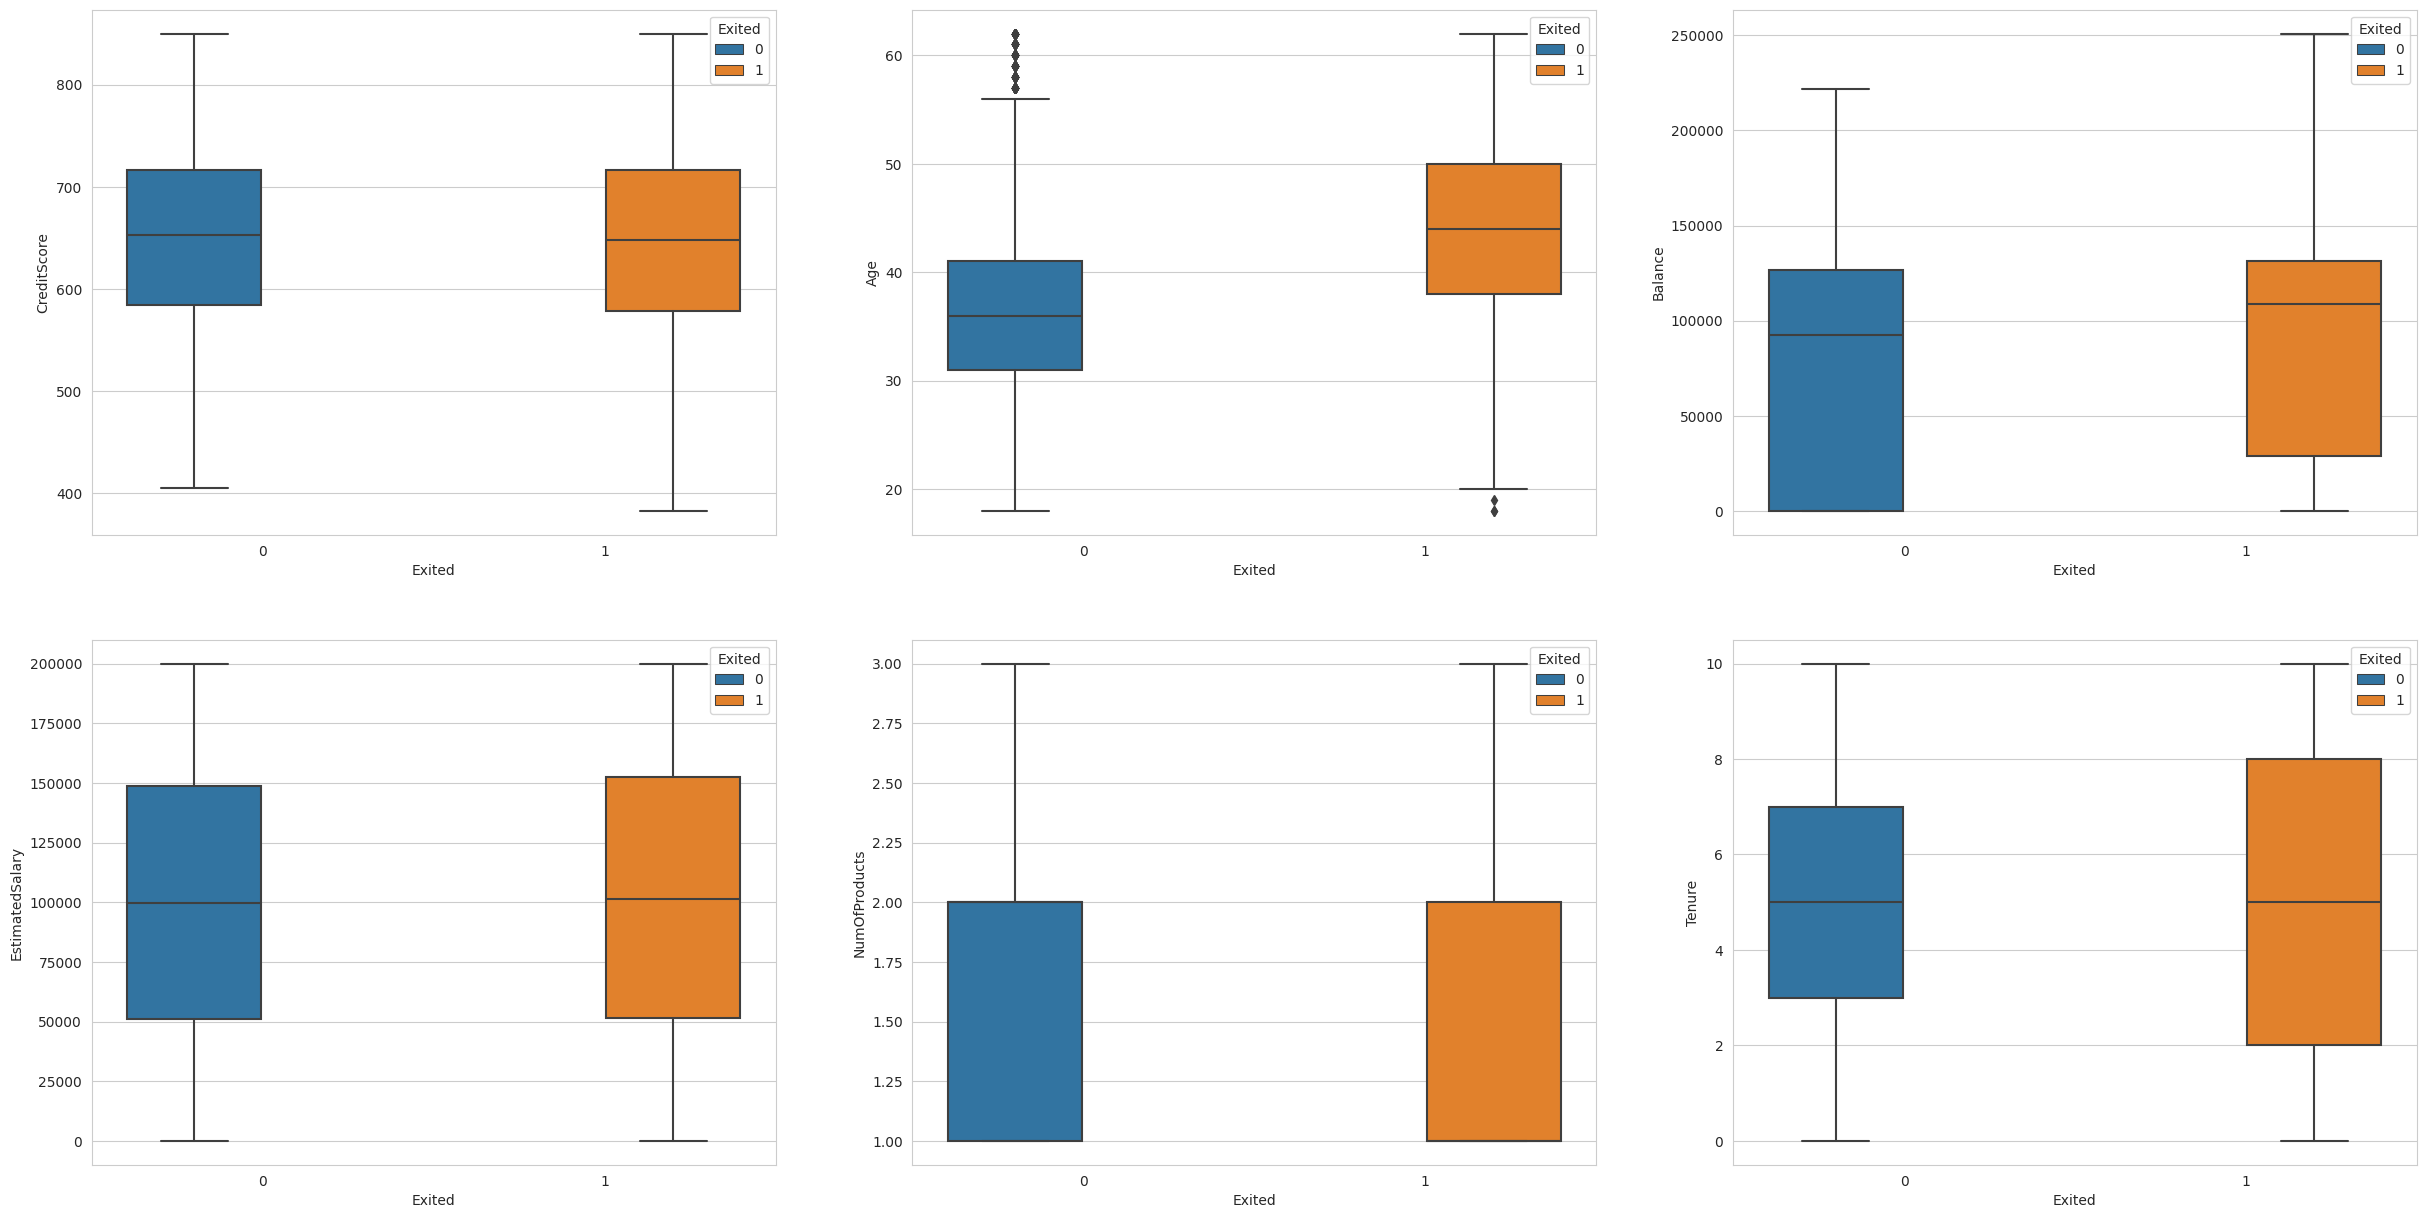

In [234]:

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

**Countplot**

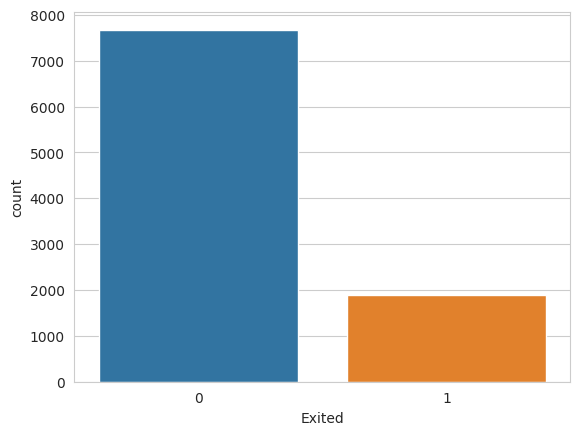

In [235]:
sns.countplot(x='Exited', data=df)
plt.show()

In [236]:
df['Exited'].value_counts()

0    7677
1    1891
Name: Exited, dtype: int64

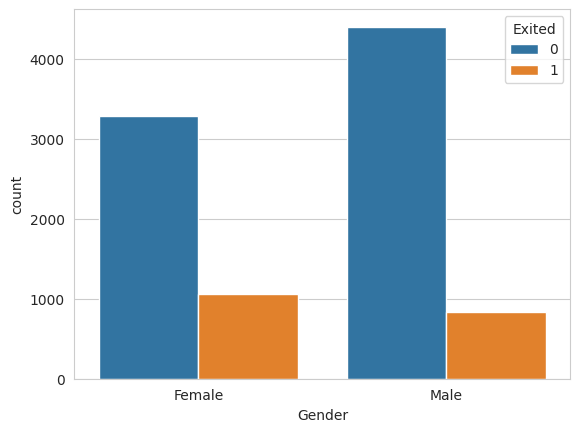

In [237]:
sns.countplot(x="Gender", hue="Exited", data=df)
plt.show()

In [385]:
df['Gender'].value_counts()

1    5236
0    4332
Name: Gender, dtype: int64

probability of churn for female is higher

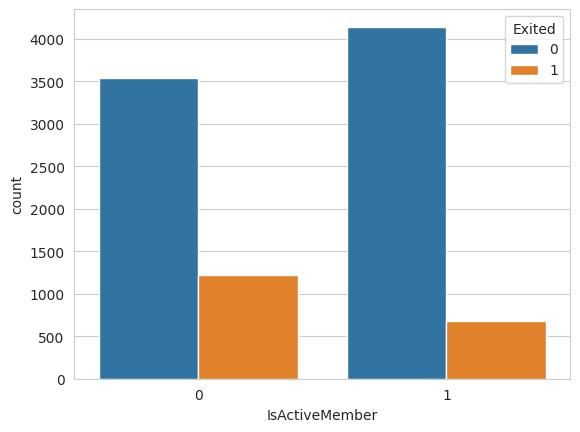

In [238]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df)
plt.show()

probability of customer churn who are not active is higher

<Axes: xlabel='Tenure', ylabel='count'>

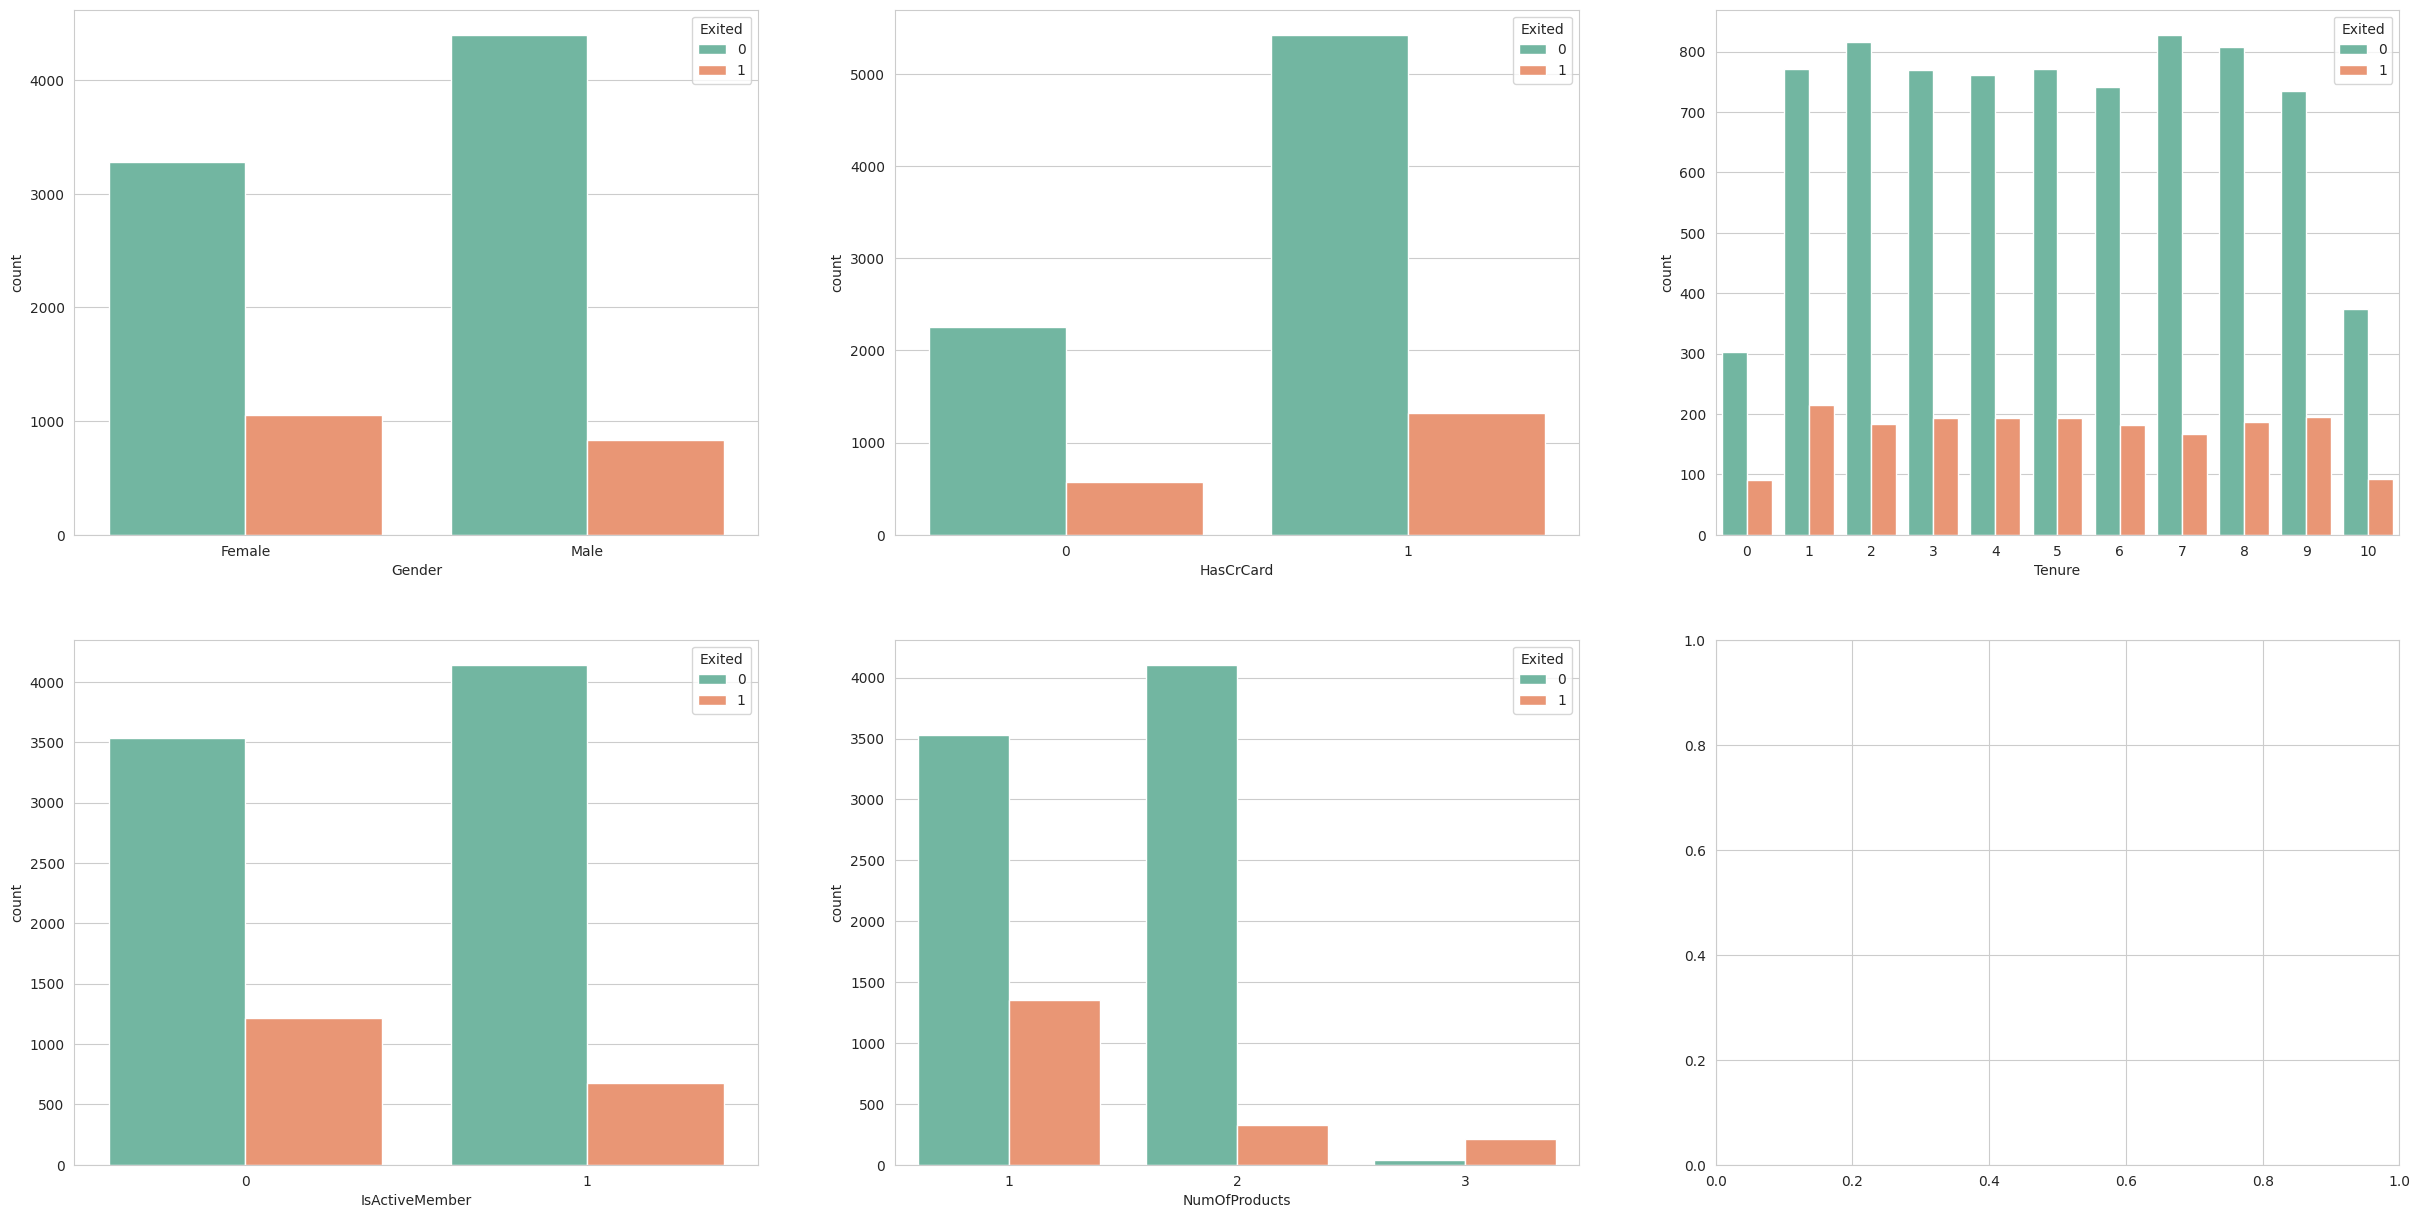

In [239]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=df, palette='Set2', ax=ax[0][2])

customers using less products have more probability of staying

**Label Encoding**

In [240]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [241]:
encoder = preprocessing.LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

<ipython-input-241-5f7859c9d956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = encoder.fit_transform(df["Gender"])
<ipython-input-241-5f7859c9d956>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Geography"] = encoder.fit_transform(df["Geography"])


transforming categorical value into numerical

In [242]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Correlation Matrix**

<ipython-input-243-1b9b85051144>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")


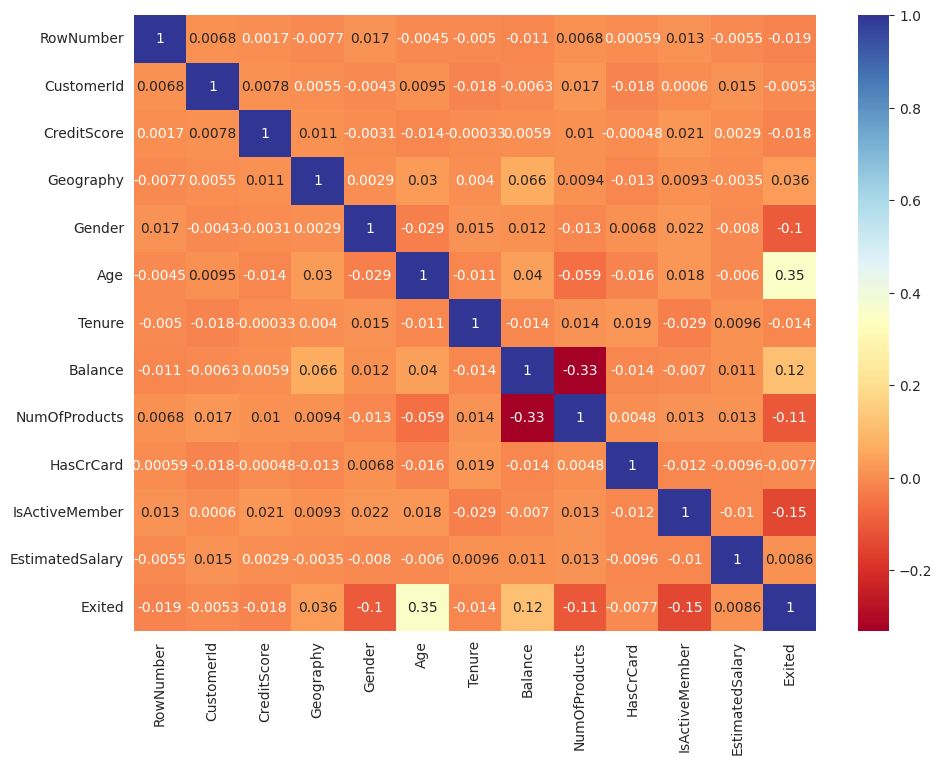

In [243]:
# checking correlation matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

relation among features

**Dropping irrelevant features**

In [244]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname','Geography'],axis=1)

drop irrelevant attributes

In [245]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [246]:
X = df.drop('Exited',axis=1)
y = df['Exited']

splitting dataset into features and target variable

**Balancing target variable exited**

In [248]:
from imblearn.over_sampling import SMOTE

In [249]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [250]:
y_res.value_counts()

1    7677
0    7677
Name: Exited, dtype: int64

balance target variable

**Split into testing and training dataset**

In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [252]:
print(X.shape, X_train.shape, X_test.shape)

(9568, 9) (12283, 9) (3071, 9)


In [253]:
print(y.shape, y_train.shape, y_test.shape)

(9568,) (12283,) (3071,)


**Feature scaling**

In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [256]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8
0,0.555141,1.202025,-0.222869,1.168424,0.851309,-0.733585,0.783755,-0.746839,-1.717619
1,-0.075880,1.202025,2.526655,1.535749,-1.356092,1.151089,-1.275908,-0.746839,0.955508
2,-0.208727,1.202025,-0.222869,0.801099,-1.356092,1.151089,0.783755,-0.746839,1.400565
3,0.278377,-0.831929,-0.222869,-1.402850,0.347081,-0.733585,-1.275908,-0.746839,-1.358442
4,0.079107,1.202025,0.235385,0.066449,-0.677007,-0.733585,0.783755,-0.746839,0.213754


normalizing values of features

**MODELS**

In [257]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

**DecisionTree**

In [258]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [259]:
y_pred1 = dt.predict(X_test)

In [322]:
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred1)* 100))

Decision Tree Accuracy: 77.73%


In [323]:
print("Decision Tree Precision: {:.2f}%".format(precision_score(y_test,y_pred1) * 100))

Decision Tree Precision: 75.65%


In [387]:
recall_score(y_test,y_pred1)

0.7990622906898861

In [388]:
f1_score(y_test,y_pred1)

0.777198697068404

**Random Forest**

In [314]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=400)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=400)

In [315]:
y_pred2 = rf.predict(X_test)

In [326]:
print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred2) * 100))


Random Forest Accuracy: 85.90%


In [327]:
print("Random Forest Precision: {:.2f}%".format(precision_score(y_test,y_pred2) * 100))

Random Forest Precision: 84.69%


In [389]:
recall_score(y_test,y_pred2)

0.8667113194909578

In [391]:
f1_score(y_test,y_pred2)

0.8566699768288646

**KNN**

In [335]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [336]:
y_pred3 = knn.predict(X_test)

In [337]:
print("\nKNN Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred3) * 100))


KNN Accuracy: 81.34%


In [338]:
print("KNN Precision: {:.2f}%".format(precision_score(y_test,y_pred3) * 100))

KNN Precision: 79.11%


In [392]:
recall_score(y_test,y_pred3)

0.8372404554588078

In [393]:
f1_score(y_test,y_pred3)

0.8135372600065083

**Logistic regression**

In [276]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [277]:
y_pred4 = log.predict(X_test)

In [342]:
print("\nLogistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred4) * 100))


Logistic Regression Accuracy: 79.42%


In [343]:
print("Logistic Regression Precision: {:.2f}%".format(precision_score(y_test,y_pred4) * 100))

Logistic Regression Precision: 77.83%


In [394]:
recall_score(y_test,y_pred4)

0.8064300066979236

In [395]:
f1_score(y_test,y_pred4)

0.7921052631578948

**compare accuracy of models**

In [351]:
accuracy=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4)]})
accuracy['ACC'] = (accuracy['ACC'] * 100).round(2)


In [352]:
accuracy

,Models,ACC
0,DecisionTree,77.73
1,RandomForest,85.90
2,KNN,81.34
3,LogisticRegression,79.42


random forest have highest accuracy

**Compare presision of models**

In [353]:
precision=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'PR':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4)]})
precision['PR'] = (precision['PR'] * 100).round(2)

In [354]:
precision

,Models,PR
0,DecisionTree,75.65
1,RandomForest,84.69
2,KNN,79.11
3,LogisticRegression,77.83


random forest have highest precision

**compare recall value of models**

In [396]:
recall=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'RV':[recall_score(y_test,y_pred1),
                              recall_score(y_test,y_pred2),
                              recall_score(y_test,y_pred3),
                              recall_score(y_test,y_pred4)]})


In [397]:
recall

,Models,RV
0,DecisionTree,0.799062
1,RandomForest,0.866711
2,KNN,0.837240
3,LogisticRegression,0.806430


random forest have highest recall value

**Compare F1 score of models**

In [398]:
F1=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'F1S':[f1_score(y_test,y_pred1),
                              f1_score(y_test,y_pred2),
                              f1_score(y_test,y_pred3),
                              f1_score(y_test,y_pred4)]})


In [399]:
F1

,Models,F1S
0,DecisionTree,0.777199
1,RandomForest,0.856670
2,KNN,0.813537
3,LogisticRegression,0.792105


random forest have highest f1 score

**Barchart of evaluation metrics**

In [361]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

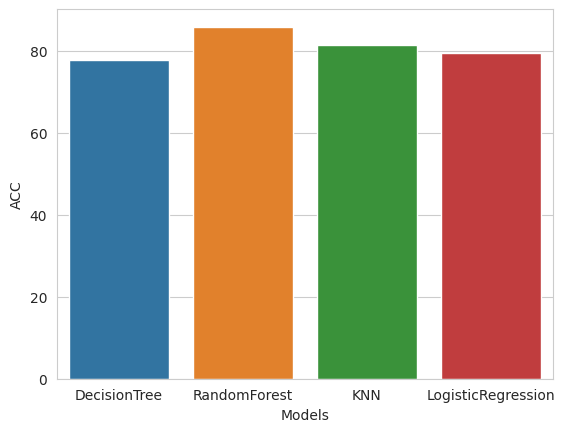

In [362]:
sns.barplot(x = 'Models', y = 'ACC', data = accuracy)

<Axes: xlabel='Models', ylabel='PR'>

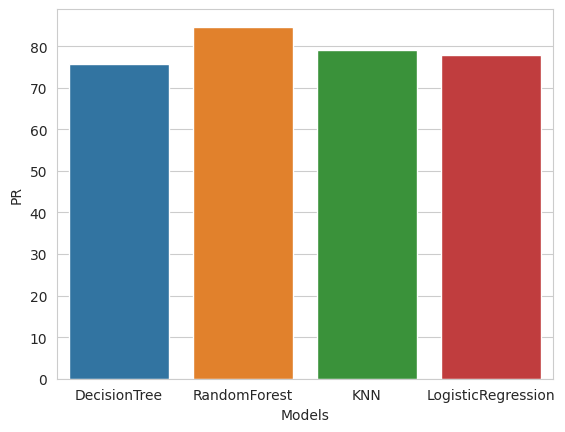

In [363]:
sns.barplot(x = 'Models', y = 'PR', data = precision)

<Axes: xlabel='Models', ylabel='RV'>

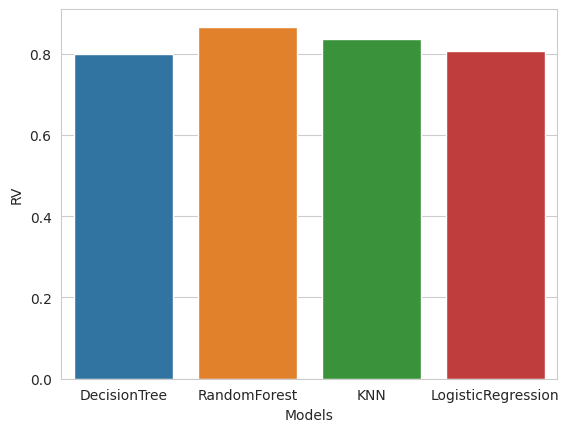

In [400]:
sns.barplot(x = 'Models', y = 'RV', data = recall)

<Axes: xlabel='Models', ylabel='F1S'>

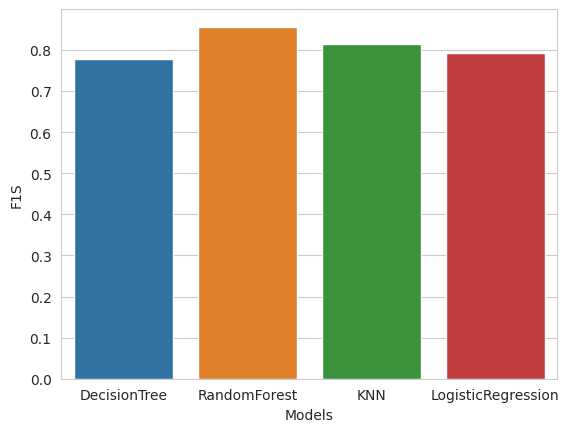

In [401]:
sns.barplot(x = 'Models', y = 'F1S', data = F1)

**ROC Curve**

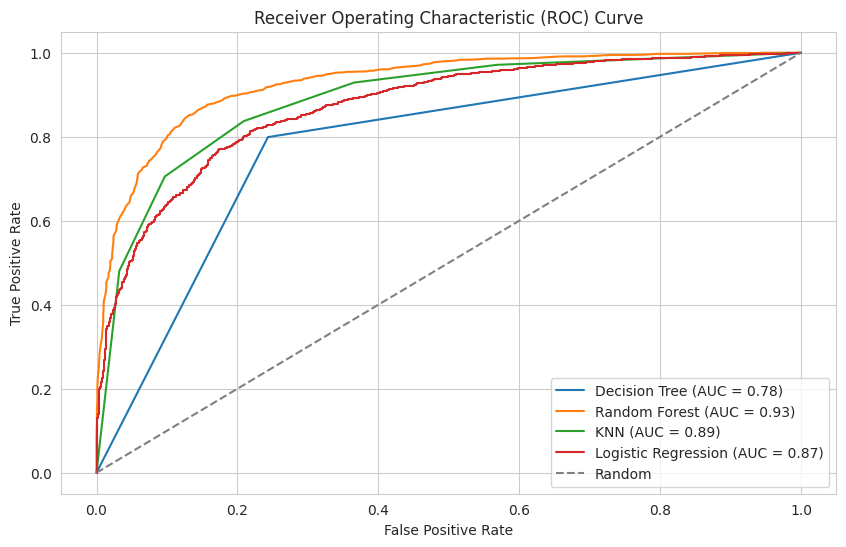

In [366]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Decision Tree
y_prob1 = dt.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob1)
roc_auc1 = auc(fpr1, tpr1)

# Random Forest
y_prob2 = rf.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob2)
roc_auc2 = auc(fpr2, tpr2)

# KNN
y_prob3 = knn.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob3)
roc_auc3 = auc(fpr3, tpr3)

# Logistic Regression
y_prob4 = log.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_prob4)
roc_auc4 = auc(fpr4, tpr4)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label=f'Decision Tree (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Random Forest (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'KNN (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'Logistic Regression (AUC = {roc_auc4:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


random forest have better AUC Value

**AUC-PR Curve**

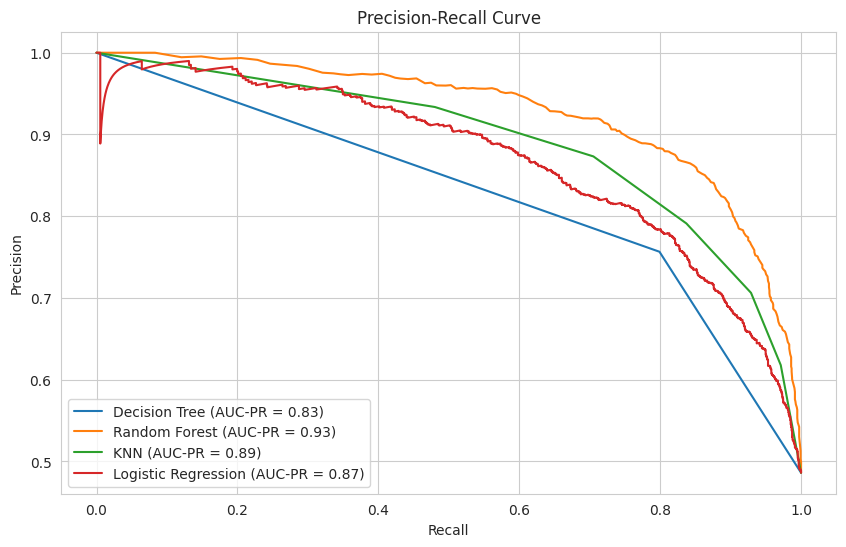

In [367]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and predicted probabilities or decision function scores for each model

# Decision Tree
precision1, recall1, _ = precision_recall_curve(y_test, dt.predict_proba(X_test)[:, 1])
auc_pr1 = auc(recall1, precision1)

# Random Forest
precision2, recall2, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc_pr2 = auc(recall2, precision2)

# KNN
precision3, recall3, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
auc_pr3 = auc(recall3, precision3)

# Logistic Regression
precision4, recall4, _ = precision_recall_curve(y_test, log.predict_proba(X_test)[:, 1])
auc_pr4 = auc(recall4, precision4)

# Plotting the Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall1, precision1, label=f'Decision Tree (AUC-PR = {auc_pr1:.2f})')
plt.plot(recall2, precision2, label=f'Random Forest (AUC-PR = {auc_pr2:.2f})')
plt.plot(recall3, precision3, label=f'KNN (AUC-PR = {auc_pr3:.2f})')
plt.plot(recall4, precision4, label=f'Logistic Regression (AUC-PR = {auc_pr4:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


random forest has a better AUC - PR Value

**Confusion matrix**

In [368]:
from sklearn.metrics import confusion_matrix

In [369]:
# accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [370]:
# accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

Confusion Matrix:


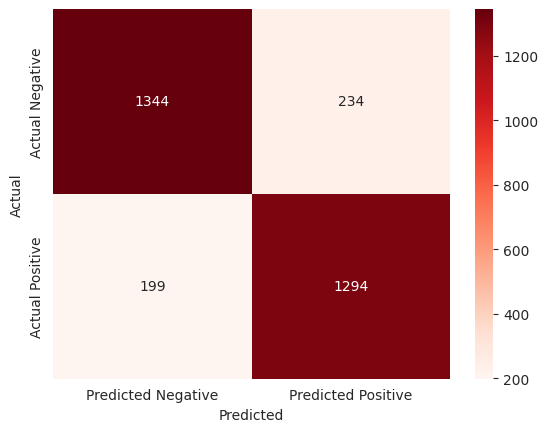

In [403]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example true labels and predicted labels (replace these with your actual data)
true_labels = y_test
predicted_labels = X_test_prediction

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [373]:
y_test.shape

(3071,)

**Saving Model**

In [374]:
X_res=sc.fit_transform(X_res)

In [375]:
rf.fit(X_res,y_res)

RandomForestClassifier(n_estimators=200, random_state=400)

In [376]:
import joblib

In [377]:
joblib.dump(rf,'churn_predict_model.pkl')

['churn_predict_model.pkl']

In [378]:
model = joblib.load('churn_predict_model.pkl')

In [379]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Prediction**

In [380]:
model.predict([[619,0,42,2,0.0,0,0,0,101348.88]])

array([1])

customer exits

In [381]:
model.predict([[608,1,41,1,83807.86,1,0,1,112542.58]])

array([0])

customer stays

In [382]:
model.predict([[850,0,43,2,125510.82,1,1,1,79084.10]])

array([0])

customer stays

**Model**

In [383]:
from google.colab import files
import joblib
model_filename="churn_predict_model.pkl"

In [ ]:
joblib.dump(model,model_filename)
files.download('churn_predict_model.pkl')